Q1

In [1]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

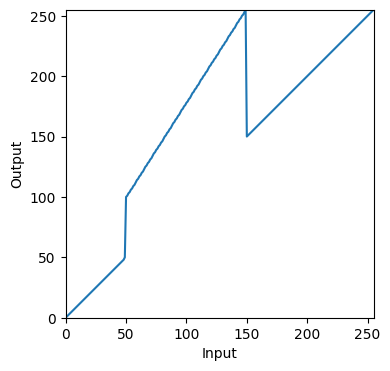

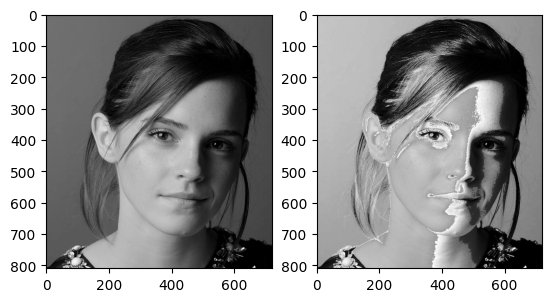

In [14]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('emma.jpg',cv.IMREAD_GRAYSCALE)

c = np.array([(50,50),(50,100),(150,255),(150,150)])

t1 = np.linspace(0,c[0,1],c[0,0]).astype('uint8')
t2 = np.linspace(c[0,1],c[1,1],c[1,0]-c[0,0]).astype('uint8')
t3 = np.linspace(c[1,1],c[2,1],c[2,0]-c[1,0]).astype('uint8')
t4 = np.linspace(c[2,1],c[3,1],c[3,0]-c[2,0]).astype('uint8') 
t5 = np.linspace(c[3,1],255,256-c[3,0]).astype('uint8')

transform = np.concatenate((t1,t2,t3,t4,t5),axis=0).astype('uint8')

img_transformed = cv.LUT(img,transform)

fig,ax = plt.subplots(figsize=(4,4))
ax.plot(transform)
ax.set_xlabel('Input')
ax.set_ylabel('Output')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')

plt.show()

fig,ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray')
ax[1].imshow(img_transformed, cmap='gray')
plt.show()




Q2

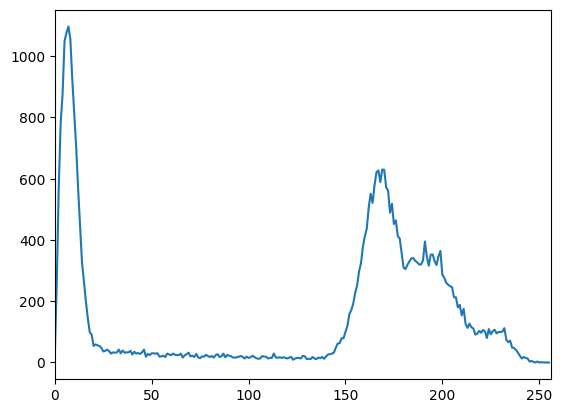

In [60]:
# Histogram of a Grayscale Image
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
hist = cv.calcHist([img], [0], None, [256], [0,256])
plt.plot(hist)
plt.xlim([0,256])
plt.show()

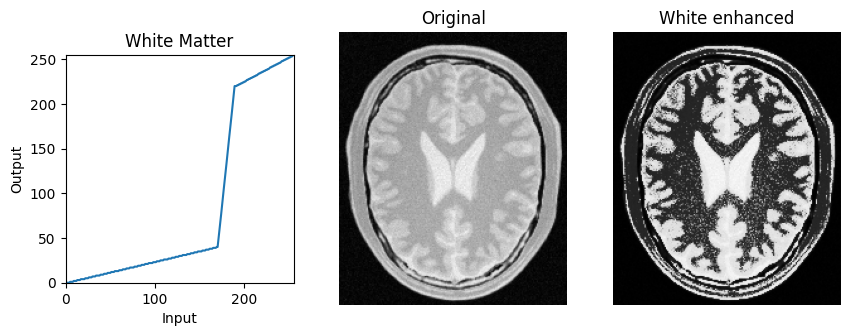

In [51]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('BrainProtonDensitySlice9.png',cv.IMREAD_GRAYSCALE)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)



t1 = np.linspace(0,40,170).astype('uint8')
#print(len(t1))

t2 = np.linspace(40,220,20).astype('uint8')

t3 = np.linspace(220,255,66).astype('uint8')
#print(len(t3))

white_transform = np.concatenate((t1,t2,t3),axis=0).astype('uint8')
img_transformed = cv.LUT(img,white_transform)



fig,ax = plt.subplots(1,3,figsize = (10,6))
ax[0].plot(white_transform), ax[0].set_aspect('equal'),ax[0].set_title('White Matter'), ax[0].set_xlabel('Input'), ax[0].set_ylabel('Output'), ax[0].set_xlim(0,255), ax[0].set_ylim(0,255)



ax[1].imshow(img),ax[1].set_title('Original'),ax[1].axis('off')
ax[2].imshow(img_transformed),ax[2].set_title('White enhanced'),ax[2].axis('off')
plt.show()


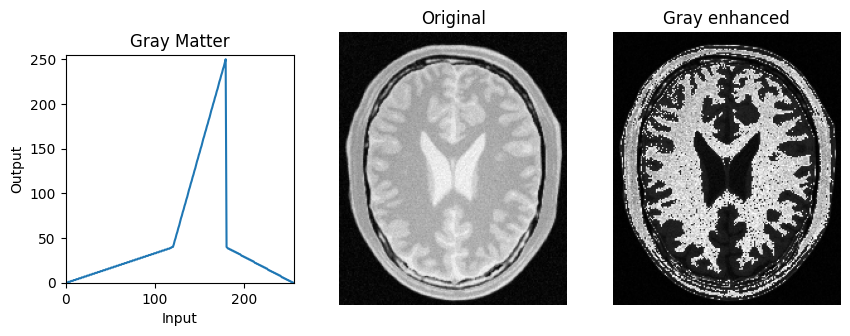

In [58]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('BrainProtonDensitySlice9.png',cv.IMREAD_GRAYSCALE)
#img = cv.cvtColor(img, cv.COLOR_BGR2RGB)



t1 = np.linspace(0,40,120).astype('uint8')


# t2 = np.linspace(40,200,0).astype('uint8')

# t3 = np.linspace(200,250,30).astype('uint8')

# t4 = np.linspace(250,200,30).astype('uint8')

# t5 = np.linspace(200,40,0).astype('uint8')

t2 = np.linspace(40,250,60).astype('uint8')

t4 = np.linspace(250,40,0).astype('uint8')


t5 = np.linspace(40,0,76).astype('uint8')


white_transform = np.concatenate((t1,t2,t4,t5),axis=0).astype('uint8')
img_transformed = cv.LUT(img,white_transform)



fig,ax = plt.subplots(1,3,figsize = (10,6))
ax[0].plot(white_transform), ax[0].set_aspect('equal'),ax[0].set_title('Gray Matter'), ax[0].set_xlabel('Input'), ax[0].set_ylabel('Output'), ax[0].set_xlim(0,255), ax[0].set_ylim(0,255)



ax[1].imshow(img, cmap ='gray'),ax[1].set_title('Original'),ax[1].axis('off')
ax[2].imshow(img_transformed, cmap='gray'),ax[2].set_title('Gray enhanced'),ax[2].axis('off')
plt.show()


Q3

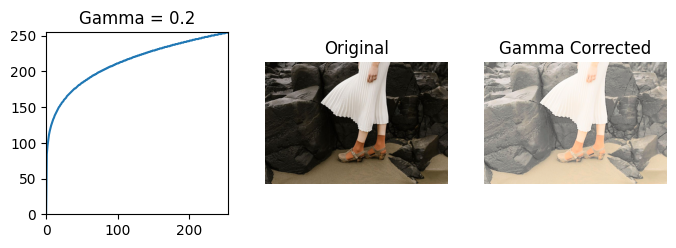

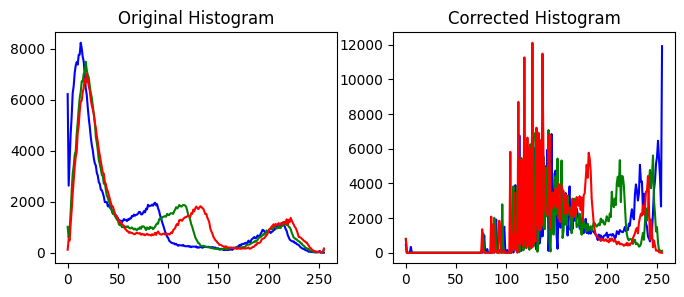

In [1]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt 

img = cv.imread('highlights_and_shadows.jpg')

lab = cv.cvtColor(img, cv.COLOR_BGR2Lab)

L = lab[:,:,0]

gamma = 0.2

table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')
img_gamma_L = cv.LUT(L, table)

img1 = img.copy()

img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)

lab[:, :, 0] = img_gamma_L

img_corrected = cv.cvtColor(lab, cv.COLOR_Lab2RGB)

fig,ax = plt.subplots(1,3,figsize=(8,3))

ax[0].plot(table), ax[0].set_title('Gamma = '+ str(gamma)), ax[0].set_xlim(0,255), ax[0].set_ylim(0,255),ax[0].set_aspect('equal')
ax[1].imshow(img1),ax[1].set_title('Original'),ax[1].axis('off')
ax[2].imshow(img_corrected),ax[2].set_title('Gamma Corrected'),ax[2].axis('off')
plt.show()

fig,ax = plt.subplots(1,2,figsize=(8,3))

color = ('b', 'g', 'r')
for i, c in enumerate(color):
    hist_orig = cv.calcHist([img], [i], None, [256], [0,256])
    ax[0].plot(hist_orig, color = c), ax[0].set_title('Original Histogram')
    hist_gamma = cv.calcHist([img_corrected], [i], None, [256], [0,256])
    ax[1].plot(hist_gamma, color = c),ax[1].set_title('Corrected Histogram')    











Q4

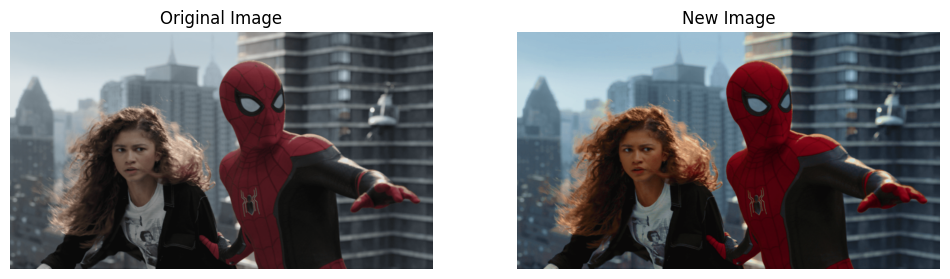

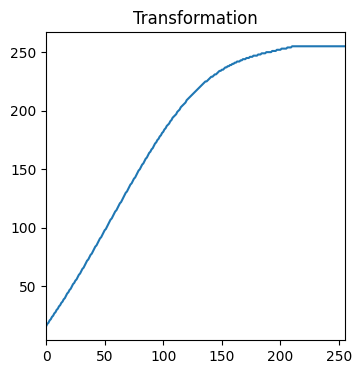

In [64]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt 

sigma = 70
a = 0.7

img = cv.imread('spider.png')

hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)

hue, saturation, value = cv.split(hsv_img)


table = np.array([min(255, (x + (a * 128) * np.exp(-((x - 128) ** 2) / (2 * sigma ** 2)))) for x in np.arange(0, 256)]).astype('uint8')
saturation_new = cv.LUT(saturation, table)

img_new = cv.merge([hue,saturation_new,value])
img_new = cv.cvtColor(img_new,cv.COLOR_HSV2RGB)

img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

fig,ax = plt.subplots(1,2,figsize=(12,5))

ax[0].imshow(img), ax[0].set_title('Original Image'),ax[0].axis('off')
ax[1].imshow(img_new), ax[1].set_title('New Image'), ax[1].axis('off')

plt.show()

fig,ax = plt.subplots(figsize=(4,4))
ax.plot(table) , ax.set_xlim(0,255),ax.set_aspect('equal'), ax.set_title('Transformation')
plt.show()



Q5

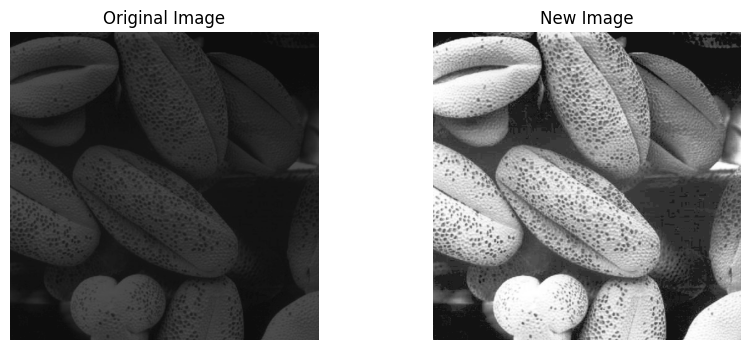

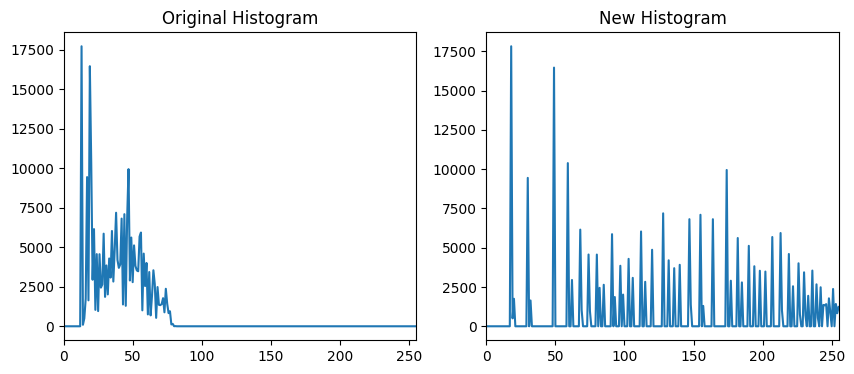

In [70]:
import cv2 as cv    
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('shells.tif', cv.IMREAD_GRAYSCALE)

img1 = img
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)


pixels = img.shape[0]*img.shape[1]

hist = np.zeros(256)

for i in range(img.shape[0]):           #rows
    for j in range(img.shape[1]):       #columns
         hist[img[i,j]] += 1


pdf = hist/(pixels)
cdf = np.zeros(256)
cdf[0] = pdf[0]

for i in range(1,256):
    cdf[i] = cdf[i-1] + pdf[i]

#cdf = np.round(cdf*255)

cdf= np.round(cdf*255).astype('uint8')

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img[i,j] = cdf[img[i,j]]

new_hist = np.zeros(256)

for i in range(img.shape[0]):           #rows
    for j in range(img.shape[1]):       #columns
         new_hist[img[i,j]] += 1


img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

fig,ax = plt.subplots(1,2,figsize=(10,4))
ax[0].imshow(img1, cmap='gray'),ax[0].set_title('Original Image'),ax[0].axis('off')
ax[1].imshow(img, cmap='gray'),ax[1].set_title('New Image'),ax[1].axis('off')


fig,ax = plt.subplots(1,2,figsize=(10,4))
ax[0].plot(hist),ax[0].set_title('Original Histogram'),ax[0].set_xlim(0,255)
ax[1].plot(new_hist),ax[1].set_title('New Histogram'),ax[1].set_xlim(0,255)
plt.show()



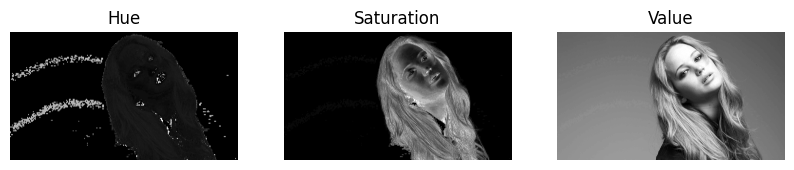

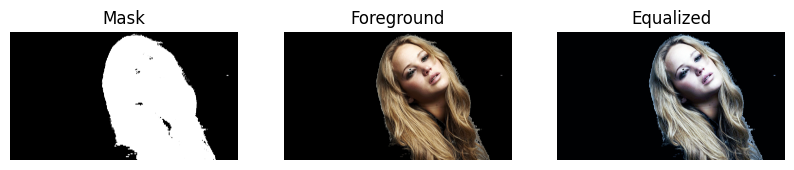

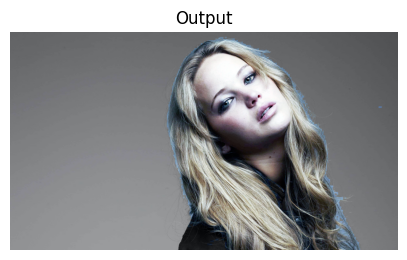

In [77]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('jeniffer.jpg')

hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)

hue, saturation, value = cv.split(hsv_img)

mask_foreground = cv.threshold(saturation,11,255,cv.THRESH_BINARY)[1]

final = cv.bitwise_and(img,img, mask=mask_foreground) 
final2 = cv.cvtColor(final,cv.COLOR_BGR2RGB)

hist_blue = cv.calcHist([final], [0], mask_foreground, [256], [0, 256])
hist_green = cv.calcHist([final], [1], mask_foreground, [256], [0, 256])
hist_red = cv.calcHist([final], [2], mask_foreground, [256], [0, 256])

hist_blue_sum = np.cumsum(hist_blue)
hist_green_sum = np.cumsum(hist_green)
hist_red_sum = np.cumsum(hist_red)

hist_blue_sum2 = np.round(hist_blue_sum*255/hist_blue_sum[-1]).astype('uint8')
hist_green_sum2 = np.round(hist_green_sum*255/hist_green_sum[-1]).astype('uint8')
hist_red_sum2 = np.round(hist_red_sum*255/hist_red_sum[-1]).astype('uint8')

blue_equalized = hist_blue_sum2[final[:,:,0]]
green_equalized = hist_green_sum2[final[:,:,1]]
red_equalized = hist_red_sum2[final[:,:,2]]

equalized = cv.merge([blue_equalized,green_equalized,red_equalized])
equalized2 = cv.cvtColor(equalized,cv.COLOR_BGR2RGB)

fig,ax = plt.subplots(1,3,figsize=(10,5))

ax[0].imshow(hue, cmap='gray'), ax[0].set_title('Hue'), ax[0].axis('off')
ax[1].imshow(saturation, cmap='gray'), ax[1].set_title('Saturation'), ax[1].axis('off')
ax[2].imshow(value, cmap='gray'), ax[2].set_title('Value'), ax[2].axis('off')

plt.show()

fig,ax = plt.subplots(1,3,figsize=(10,5))

ax[0].imshow(mask_foreground,cmap='gray'),ax[0].axis('off'),ax[0].set_title('Mask')
ax[1].imshow(final2),ax[1].axis('off'),ax[1].set_title('Foreground')
ax[2].imshow(equalized2),ax[2].axis('off'),ax[2].set_title('Equalized')
plt.show()

background_mask = cv.bitwise_not(mask_foreground)
background = cv.bitwise_and(img,img, mask=background_mask)

output = cv.add(background,equalized)
output = cv.cvtColor(output,cv.COLOR_BGR2RGB)

fig,ax = plt.subplots(figsize=(5, 5))
ax.imshow(output),ax.axis('off'),ax.set_title('Output')
plt.show()


Q7

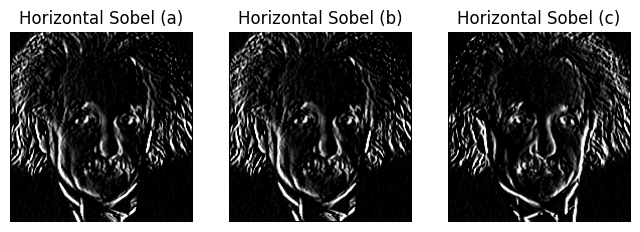

In [116]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('einstein.png',cv.IMREAD_REDUCED_GRAYSCALE_2)

#a

kernel_horizontal = np.array([[-1,0,1],[-2,0,2],[-1,0,1]],dtype='float')

imgh_a = cv.filter2D(img,-1,kernel_horizontal)

imgh_a = np.maximum(imgh_a, 0)

#b


imgh_b = np.zeros(img.shape)

for i in range(1,img.shape[0]-1):
    for j in range(1,img.shape[1]-1):

        imgh_b[i,j] = img[i-1,j-1]*kernel_horizontal[0,0] + img[i-1,j]*kernel_horizontal[0,1] + img[i-1,j+1]*kernel_horizontal[0,2] + \
                    img[i,j-1]*kernel_horizontal[1,0] + img[i,j]*kernel_horizontal[1,1] + img[i,j+1]*kernel_horizontal[1,2] + \
                    img[i+1,j-1]*kernel_horizontal[2,0] + img[i+1,j]*kernel_horizontal[2,1] + img[i+1,j+1]*kernel_horizontal[2,2]



imgh_b =np.clip(imgh_b, 0, 255).astype('uint8')


#c


kernel1 = np.array([[1,2,1]])
kernel2 = np.array([[1,0,-1]])

imgh_c = cv.sepFilter2D(img,-1,kernel2,kernel1)

imgh_c = np.maximum(imgh_c,0)


fig,ax = plt.subplots(1,3,figsize=(8,4))

ax[0].imshow(imgh_a,cmap='gray'),ax[0].set_title('Horizontal Sobel (a)'),ax[0].axis('off')
ax[1].imshow(imgh_b,cmap='gray'),ax[1].set_title('Horizontal Sobel (b)'),ax[1].axis('off')
ax[2].imshow(imgh_c,cmap='gray'),ax[2].set_title('Horizontal Sobel (c)'),ax[2].axis('off')


plt.show()



Q9

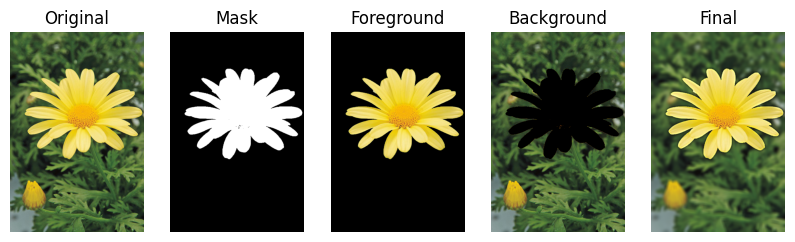

In [49]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('flower.png')

mask2 = np.zeros(img.shape[:2], np.uint8)
background_mdl = np.zeros((1,65), np.float64)
foreground_mdl = np.zeros((1,65), np.float64)

#img.shape = 842,562,3
rect = (0,0,650,562)          # h,w

cv.grabCut(img, mask2, rect, background_mdl, foreground_mdl, 5, cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask2==2)|(mask2==0),0,1).astype('uint8')

foreground = img*mask2[:,:,np.newaxis]
# background = img - foreground
background = cv.subtract(img,foreground)

blurred_bg = cv.blur(background,(15,15),0)

# final = blurred_bg + foreground
final = cv.add(blurred_bg,foreground)

fig,ax = plt.subplots(1,5, figsize= (10,6))

img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
foreground = cv.cvtColor(foreground,cv.COLOR_BGR2RGB)
background = cv.cvtColor(background,cv.COLOR_BGR2RGB)
final = cv.cvtColor(final,cv.COLOR_BGR2RGB)

ax[0].imshow(img),ax[0].set_title('Original'),ax[0].axis('off')
ax[1].imshow(mask2,cmap='gray'),ax[1].set_title('Mask'),ax[1].axis('off')
ax[2].imshow(foreground),ax[2].set_title('Foreground'),ax[2].axis('off')
ax[3].imshow(background),ax[3].set_title('Background'),ax[3].axis('off')
ax[4].imshow(final),ax[4].set_title('Final'),ax[4].axis('off')

plt.show()





Q8